In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('https://o2.eas.gatech.edu/data/ATL_MonMeanTemp_1879_2020.xls',skiprows=1)
df # display the dataFrame

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1879,44.3,43.7,57.6,58.9,69.8,74.9,79.6,73.9,68.7,64.3,53.9,51.5
1,1880,54.3,51.4,55.5,63.4,71.0,76.5,79.2,76.8,69.4,60.8,47.2,42.1
2,1881,40.1,46.6,49.1,59.1,70.8,77.8,81.1,78.8,75.5,67.2,52.6,49.6
3,1882,48.8,52.4,57.4,64.8,66.1,76.6,75.9,75.8,71.7,65.8,51.1,41.4
4,1883,43.0,50.2,50.2,61.6,67.4,76.4,80.1,76.2,71.3,66.0,53.7,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2016,42.4,48.5,60.5,64.1,71.1,81.0,83.4,82.7,78.8,69.6,58.9,48.9
138,2017,52.0,56.1,57.7,67.8,71.1,76.6,81.2,79.2,73.8,65.7,56.2,46.8
139,2018,40.4,57.3,53.5,59.8,74.8,79.8,80.8,79.7,81.0,67.4,50.3,48.6
140,2019,45.9,53.8,55.4,65.3,76.4,77.7,82.2,82.5,82.4,68.4,52.5,51.2


In [3]:
MonMeanTemp=df.to_numpy()
X=MonMeanTemp[:,0]    # X is Year
Y=MonMeanTemp[:,8]    # Y is August temperature

In [4]:
# linear regression using pseudo inverse OR left divide
N=np.size(X)
m=21
A=np.zeros((N,m))
z=(X-np.mean(X))/np.std(X) # z-transform x axis
for n in np.arange(0,m):
    A[:,n]=z**n

#x = np.linalg.lstsq(A,Aug,rcond=None)[0]
Apinv=np.linalg.pinv(A)
#Apinv=np.linalg.inv(A.T@A)@A.T
x=Apinv@Y

#polyfit
C=np.polyfit(z,Y,m-1)

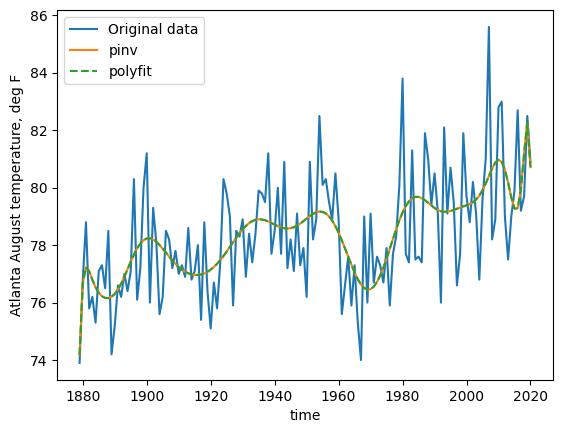

In [5]:
# calculate Yest
Yest=A@x
Yest2=np.poly1d(C)

# plot the line
plt.plot(X,Y)
plt.plot(X,Yest)
plt.plot(X,Yest2(z),'--')
plt.xlabel('time')
plt.ylabel('Atlanta August temperature, deg F')
plt.legend(['Original data','pinv','polyfit'])
plt.show()

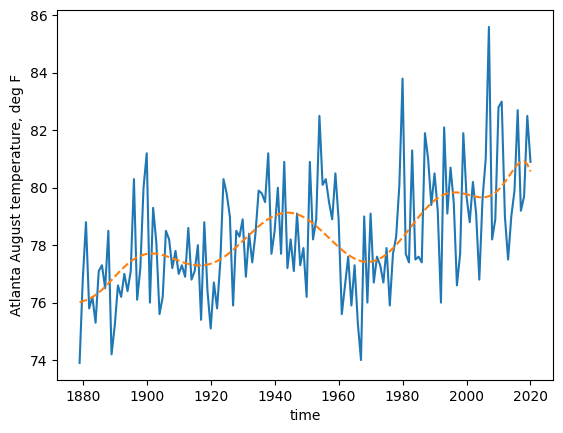

In [6]:
# 10th order polynomial fit
C=np.polyfit(z,Y,10)
yest=np.poly1d(C)
plt.plot(X,Y,'-')
plt.plot(X,yest(z),'--')
plt.xlabel('time')
plt.ylabel('Atlanta August temperature, deg F')
plt.show()

In [7]:
from scipy import signal

In [8]:
m=5
Ym = signal.convolve(Y,np.ones(m),'valid')/m

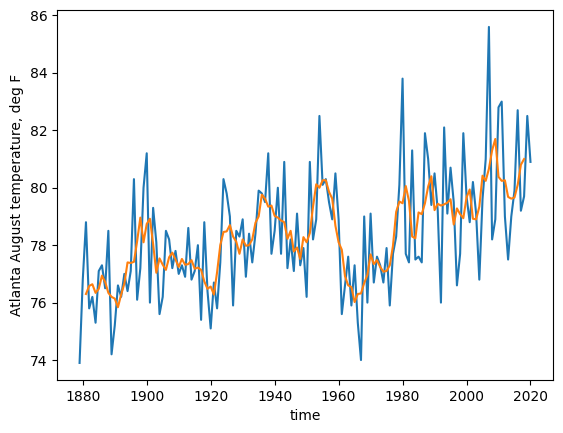

In [9]:
hm=2
plt.plot(X,Y)
plt.plot(X[hm:-hm],Ym)
plt.xlabel('time')
plt.ylabel('Atlanta August temperature, deg F')
plt.show()

In [10]:
Yhat = np.fft.fft(Y)   # get Fourier coefficients
N    = np.size(Y)
freq = np.fft.fftfreq(N) # get frequency axis

In [11]:
pd=1/freq      # calculate the period
mask= (pd < 5) # logical index with period < 5 yr
Yhat[mask]=0
Ylf=np.fft.ifft(Yhat)

<ipython-input-11-15a6544ffb10>:1: RuntimeWarning: divide by zero encountered in divide
  pd=1/freq      # calculate the period


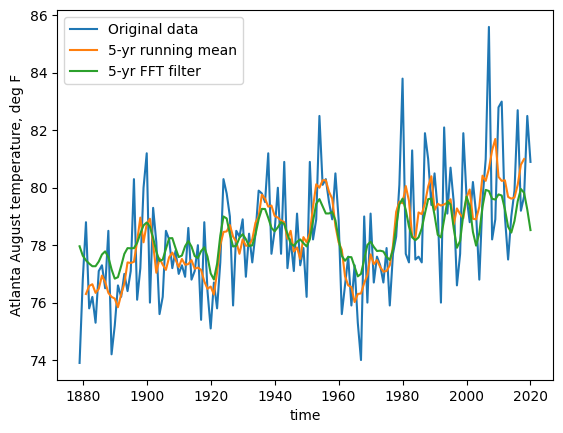

In [12]:
plt.plot(X,Y)
plt.plot(X[hm:-hm],Ym)
plt.plot(X,np.real(Ylf))
plt.xlabel('time')
plt.ylabel('Atlanta August temperature, deg F')
plt.legend(['Original data','5-yr running mean','5-yr FFT filter'])
plt.show()

In [13]:
import matplotlib.image as mpimg

In [14]:
img = mpimg.imread('flower.png')  # get the picture of a flower
img0=img[:,:,0] # just extract one color
plt.imshow(img0,cmap='gray')
plt.show()
N=np.shape(img0)
print('the size of image array is ',str(N))

FileNotFoundError: ignored

the image compression is 99.18382271323448 percent


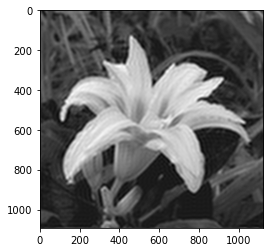

In [ ]:
# apply fft and retain low frequency component only
imghat=np.fft.fft2(img0)
M=50 # M lowest frequencies only
iM=imghat
iM[M:-M,:]=0 # truncate rows
iM[:,M:-M]=0 # truncate columns
img1=np.fft.ifft2(iM)
plt.imshow(np.real(img1),cmap='gray')
print('the image compression is '+str(100-4*M**2/(N[0]*N[1])*100)+' percent')
plt.show()